<a href="https://colab.research.google.com/github/priyanka-senthil/Medical-Insurance-Cost-Prediction-using-TensorFlow/blob/main/Medical_Insurance_Cost_Prediction_using_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Overview

We are going to predict the cost of medical insurance for individuals based on a number of different parameters such as, `age`, `sex`, `bmi`, `children`, `smoking_status` and `residential_region`.

To do, we'll leverage the pubically available [Medical Cost dataset](https://www.kaggle.com/mirichoi0218/insurance) available from Kaggle and [hosted on GitHub](https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv).


In [13]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import expand_dims

In [3]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [4]:
# Check out the insurance dataset
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


We're going to have to turn the non-numerical columns into numbers (because a neural network can't handle non-numerical inputs).

To do so, we'll use the [`get_dummies()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) method in pandas.

It converts categorical variables (like the `sex`, `smoker` and `region` columns) into numerical variables using one-hot encoding.

In [5]:
# Turn all categories into numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head() # view the converted columns

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


Now we'll split data into features (`X`) and labels (`y`).

In [6]:
# Create X & y values
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [7]:
# View features
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False


And create training and test sets. We could do this manually, but to make it easier, we'll leverage the already available [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function available from Scikit-Learn.

In [8]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42) # set random state for reproducible splits

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 11), (268, 11), (1070,), (268,))

In [20]:
# Set random seed
tf.random.set_seed(42)

# Create a new model (same as model_2)
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

# Convert X_train to a NumPy array
X_train_np = X_train.to_numpy()

# Convert X_train_np to a float32 NumPy array
X_train_np = X_train_np.astype(np.float32)

# Expand the dimension of X_train
X_train_expanded = tf.expand_dims(X_train_np, axis=-1)

# Fit the model
insurance_model.fit(X_train_expanded, y_train, epochs=100, verbose=0)

In [22]:
# Convert X_test to a NumPy array
X_test_np = X_test.to_numpy()

# Convert X_test_np to a float32 NumPy array
X_test_np = X_test_np.astype(np.float32)

# Expand the dimension of X_test
X_test_expanded = tf.expand_dims(X_test_np, axis=-1)

# Check the results of the insurance model
insurance_model.evaluate(X_test_expanded, y_test)

9/9 [==============================] - 0s 5ms/step - loss: 8916.2334 - mae: 8916.2334


[8916.2333984375, 8916.2333984375]

Our model didn't perform very well, let's try a bigger model.

We'll try 3 things:
- Increasing the number of layers (2 -> 3).
- Increasing the number of units in each layer (except for the output layer).
- Changing the optimizer (from SGD to Adam).

Everything else will stay the same.

In [23]:
# Set random seed
tf.random.set_seed(42)

# Add an extra layer and increase number of units
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
history = insurance_model_2.fit(X_train_expanded, y_train, epochs=100, verbose=0)

In [24]:
# Evaluate our larger model
insurance_model_2.evaluate(X_test_expanded, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8627.9453 - mae: 8627.9453


[8627.9453125, 8627.9453125]

Much better! Using a larger model and the Adam optimizer results in almost half the error as the previous model.


Let's check out the loss curves of our model, we should see a downward trend.

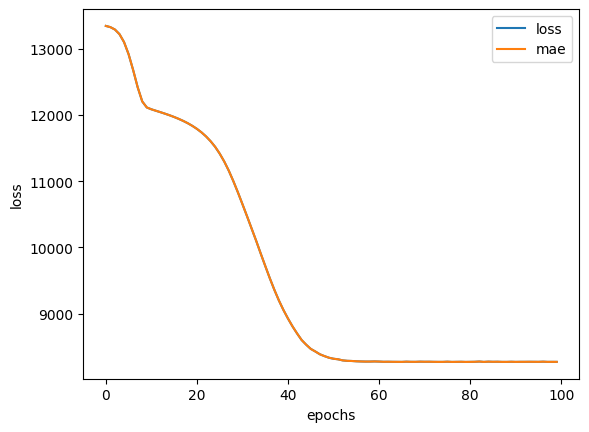

In [25]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

From this, it looks like our model's loss (and MAE) were both still decreasing (in our case, MAE and loss are the same, hence the lines in the plot overlap eachother).

What this tells us is the loss might go down if we try training it for longer.

> **How long should we train for?**

> It depends on what problem we're working on. Sometimes training won't take very long, other times it'll take longer than you expect. A common method is to set our model training for a very long time (e.g. 1000's of epochs) but set it up with an [EarlyStopping callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) so it stops automatically when it stops improving. We'll see this in another module.

Let's train the same model as above for a little longer. We can do this but calling fit on it again.

In [26]:
# Try training for a little longer (100 more epochs)
history_2 = insurance_model_2.fit(X_train_expanded, y_train, epochs=100, verbose=0)

How did the extra training go?

In [27]:
# Evaluate the model trained for 200 total epochs
insurance_model_2_loss, insurance_model_2_mae = insurance_model_2.evaluate(X_test_expanded, y_test)
insurance_model_2_loss, insurance_model_2_mae

9/9 [==============================] - 0s 4ms/step - loss: 8627.7715 - mae: 8627.7715


(8627.771484375, 8627.771484375)

Training for an extra 100 epochs we see about a 10% decrease in error.

How does the visual look?

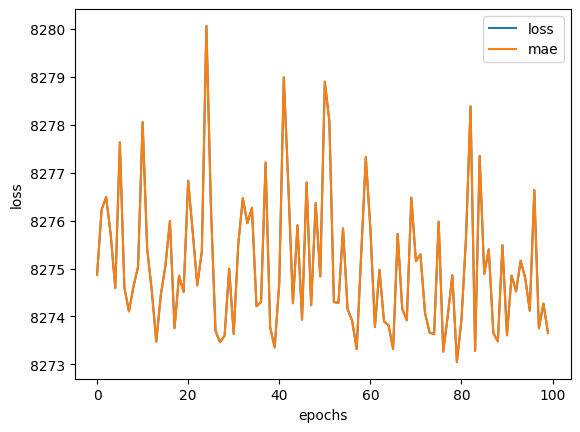

In [28]:
# Plot the model trained for 200 total epochs loss curves
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs"); # note: epochs will only show 100 since we overrid the history variable

## Preprocessing data (normalization and standardization)

A common practice when working with neural networks is to make sure all of the data you pass to them is in the range 0 to 1.

This practice is called **normalization** (scaling all values from their original range to, e.g. between 0 and 100,000 to be between 0 and 1).

There is another process call **standardization** which converts all of your data to unit variance and 0 mean.

These two practices are often part of a preprocessing pipeline (a series of functions to prepare your data for use with neural networks).

Knowing this, some of the major steps you'll take to preprocess your data for a neural network include:
* Turning all of your data to numbers (a neural network can't handle strings).
* Making sure your data is in the right shape (verifying input and output shapes).
* [**Feature scaling**](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler):
    * Normalizing data (making sure all values are between 0 and 1). This is done by subtracting the minimum value then dividing by the maximum value minus the minimum. This is also referred to as min-max scaling.
    * Standardization (making sure all values have a mean of 0 and a variance of 1). This is done by subtracting the mean value from the target feature and then dividing it by the standard deviation.
    * Which one should you use?
      * **With neural networks you'll tend to favour normalization** as they tend to prefer values between 0 and 1 (you'll see this espcially with image processing), however, you'll often find a neural network can perform pretty well with minimal feature scaling.


We've already turned our data into numbers using `get_dummies()`, let's see how we'd normalize it as well.

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [30]:
# Check out the data
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Now, just as before, we need to transform the non-numerical columns into numbers and this time we'll also be normalizing the numerical columns with different ranges (to make sure they're all between 0 and 1).

To do this, we're going to use a few classes from Scikit-Learn:
* [`make_column_transformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html) - build a multi-step data preprocessing function for the folllowing transformations:
  * [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) - make sure all numerical columns are normalized (between 0 and 1).
  * [`OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) - one hot encode the non-numerical columns.

Let's see them in action.

In [31]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

Now we've normalized it and one-hot encoding it, what does our data look like now?

In [32]:
# Non-normalized and non-one-hot encoded data example
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [33]:
# Normalized and one-hot encoded example
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

How about the shapes?

In [34]:
# Notice the normalized/one-hot encoded shape is larger because of the extra columns
X_train_normal.shape, X_train.shape

((1070, 11), (1070, 6))

Our data is normalized and numerical, let's model it.

We'll use the same model as `insurance_model_2`.

In [35]:
# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
insurance_model_3.fit(X_train_normal, y_train, epochs=200, verbose=0)

Let's evaluate the model on normalized test set.

In [36]:
# Evaulate 3rd model
insurance_model_3_loss, insurance_model_3_mae = insurance_model_3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 5ms/step - loss: 3174.2439 - mae: 3174.2439


And finally, let's compare the results from `insurance_model_2` (trained on non-normalized data) and `insurance_model_3` (trained on normalized data).

In [37]:
# Compare modelling results from non-normalized data and normalized data
insurance_model_2_mae, insurance_model_3_mae

(8627.771484375, 3174.243896484375)

In [40]:
y_preds = insurance_model_3.predict(X_test_normal)
y_preds

9/9 [==============================] - 0s 3ms/step


array([[ 9397.108  ],
       [ 6099.2217 ],
       [43845.152  ],
       [ 9345.82   ],
       [31558.783  ],
       [ 5788.9688 ],
       [ 1155.1748 ],
       [13577.964  ],
       [ 3625.521  ],
       [10299.127  ],
       [34975.3    ],
       [ 7839.135  ],
       [ 4313.209  ],
       [40262.47   ],
       [42741.574  ],
       [39956.906  ],
       [10746.528  ],
       [39878.54   ],
       [ 8806.132  ],
       [38200.188  ],
       [ 4039.24   ],
       [ 8098.8145 ],
       [  729.11536],
       [ 3135.6218 ],
       [10980.648  ],
       [11382.107  ],
       [12425.791  ],
       [ 4911.786  ],
       [10005.797  ],
       [  538.3192 ],
       [ 8377.533  ],
       [11834.209  ],
       [ 2021.7959 ],
       [ 5197.0107 ],
       [ 2995.113  ],
       [ 8877.058  ],
       [ 1912.6652 ],
       [ 8001.     ],
       [40886.344  ],
       [36409.195  ],
       [ 3101.951  ],
       [ 2365.3992 ],
       [11789.765  ],
       [11613.226  ],
       [ 5658.824  ],
       [11

In [46]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=y_preds)
mae

<tf.Tensor: shape=(268,), dtype=float32, numpy=
array([ 8623.72  ,  8866.953 , 31174.38  ,  8619.365 , 20940.29  ,
        8945.838 , 11813.381 ,  9689.897 ,  9864.548 ,  8743.404 ,
       23584.264 ,  8609.625 ,  9491.653 , 27961.594 , 30162.918 ,
       27692.518 ,  8821.566 , 27623.506 ,  8594.188 , 26177.209 ,
        9633.418 ,  8596.243 , 12239.201 , 10170.794 ,  8867.442 ,
        8954.418 ,  9243.605 ,  9227.556 ,  8697.176 , 12429.998 ,
        8589.998 ,  9065.924 , 11005.144 ,  9124.951 , 10264.315 ,
        8596.147 , 11098.22  ,  8600.451 , 28510.979 , 24729.24  ,
       10193.157 , 10726.96  ,  9054.619 ,  9010.281 ,  8982.171 ,
        9042.268 , 10223.847 ,  9826.346 , 26974.377 ,  9106.152 ,
        9608.506 , 12064.108 ,  8594.594 , 12031.365 ,  8864.661 ,
        8802.039 ,  9585.328 , 24498.754 ,  9054.28  ,  8901.519 ,
        9480.526 ,  8981.502 ,  9663.92  ,  8591.219 ,  8823.106 ,
        9575.022 , 22058.66  ,  8813.34  , 10146.541 , 11032.448 ,
        8659.6

In [50]:
# Calcuate the MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=y_preds.squeeze()) # use squeeze() to make same shape
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3174.2437>

From this we can see normalizing the data results in 10% less error using the same model than not normalizing the data.

This is **one of the main benefits of normalization: faster convergence time** (a fancy way of saying, your model gets to better results faster).

`insurance_model_2` may have eventually achieved the same results as `insurance_model_3` if we left it training for longer.

Also, the results may change if we were to alter the architectures of the models, e.g. more hidden units per layer or more layers.

But since our main goal as neural network practitioners is to decrease the time between experiments, anything that helps us get better results sooner is a plus.